<a href="https://colab.research.google.com/github/niranjana2222/Discovering-Potential-Skin-Cancer-Drugs-/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Get data
cancer = pd.read_csv('/content/descriptors2.csv')
#cancer['label'] = np.zeros((2525, 1)).tolist()
cancer['label'] = 0
print("Size", cancer.shape)

drugs = pd.read_csv('/content/zinc.csv')
#drugs['label'] = np.ones((893, 1)).tolist()
drugs['label'] = 1
print("Size", drugs.shape)

data = pd.concat([cancer, drugs])

#Clean data
data = data.dropna()
#del data['smiles']
#data = data.drop('smiles',axis=1)
print("Size", data.shape)


Size (3288, 1876)
Size (3289, 1876)
Size (4798, 1876)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
labels = data['label']
print(labels)
del data['label']
print(data)
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=42)


0       0
1       0
2       0
3       0
4       0
       ..
3262    1
3263    1
3264    1
3265    1
3266    1
Name: label, Length: 4798, dtype: int64
      nAcid   ALogP     ALogp2       AMR       apol  naAromAtom  nAromBond  \
0         0  0.3167   0.100299   93.1538  59.369790           0          0   
1         0 -0.1076   0.011578   12.5551   8.322758           0          0   
2         0 -6.1574  37.913575   71.4075  70.194478           0          0   
3         0  0.1474   0.021727  111.3365  59.298239          12         12   
4         0  2.0343   4.138376  111.6621  52.737102          17         17   
...     ...     ...        ...       ...        ...         ...        ...   
3262      0  0.0156   0.000243   36.0792  49.854688          12         18   
3263      0  2.9489   8.696011   47.2341  51.488688          15         16   
3264      0  1.0695   1.143830   41.6922  52.146274          12         18   
3265      0  0.9468   0.896430   40.0962  39.496723          11       

In [11]:
import tensorflow as tf
import keras

model = keras.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_dim=1875))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#https://www.atmosera.com/blog/binary-classification-with-neural-networks/

In [12]:
hist = model.fit(X_train, y_train, epochs=40, batch_size=10, validation_split=0.2)

Epoch 1/40
288/288 [==============================] - 6s 5ms/step - loss: 8.9664 - accuracy: 0.4187 - val_loss: 9.2764 - val_accuracy: 0.3986
Epoch 2/40
288/288 [==============================] - 1s 5ms/step - loss: 9.0256 - accuracy: 0.4149 - val_loss: 9.2764 - val_accuracy: 0.3986
Epoch 3/40
288/288 [==============================] - 2s 6ms/step - loss: 9.0256 - accuracy: 0.4149 - val_loss: 9.2764 - val_accuracy: 0.3986
Epoch 4/40
288/288 [==============================] - 1s 4ms/step - loss: 9.0256 - accuracy: 0.4149 - val_loss: 9.2764 - val_accuracy: 0.3986
Epoch 5/40
288/288 [==============================] - 1s 4ms/step - loss: 9.0256 - accuracy: 0.4149 - val_loss: 9.2764 - val_accuracy: 0.3986
Epoch 6/40
288/288 [==============================] - 1s 4ms/step - loss: 9.0256 - accuracy: 0.4149 - val_loss: 9.2764 - val_accuracy: 0.3986
Epoch 7/40
288/288 [==============================] - 1s 4ms/step - loss: 9.0256 - accuracy: 0.4149 - val_loss: 9.2764 - val_accuracy: 0.3986
Epoch 

[]

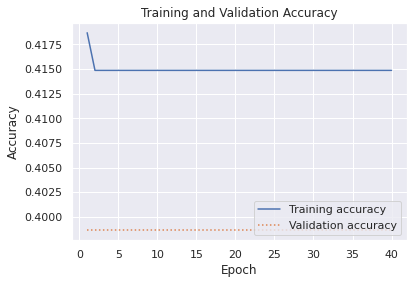

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

38/38 [==============================] - 0s 2ms/step


Text(89.18, 0.5, 'Actual label')

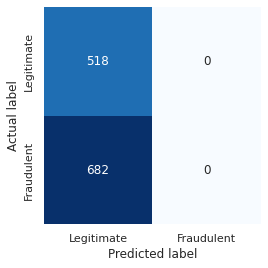

In [15]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')